# Heart Disease Analysis Project

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
from tabulate import tabulate
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings(action="ignore")

In [4]:
df=pd.read_csv("E:\DATASET\heart.csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

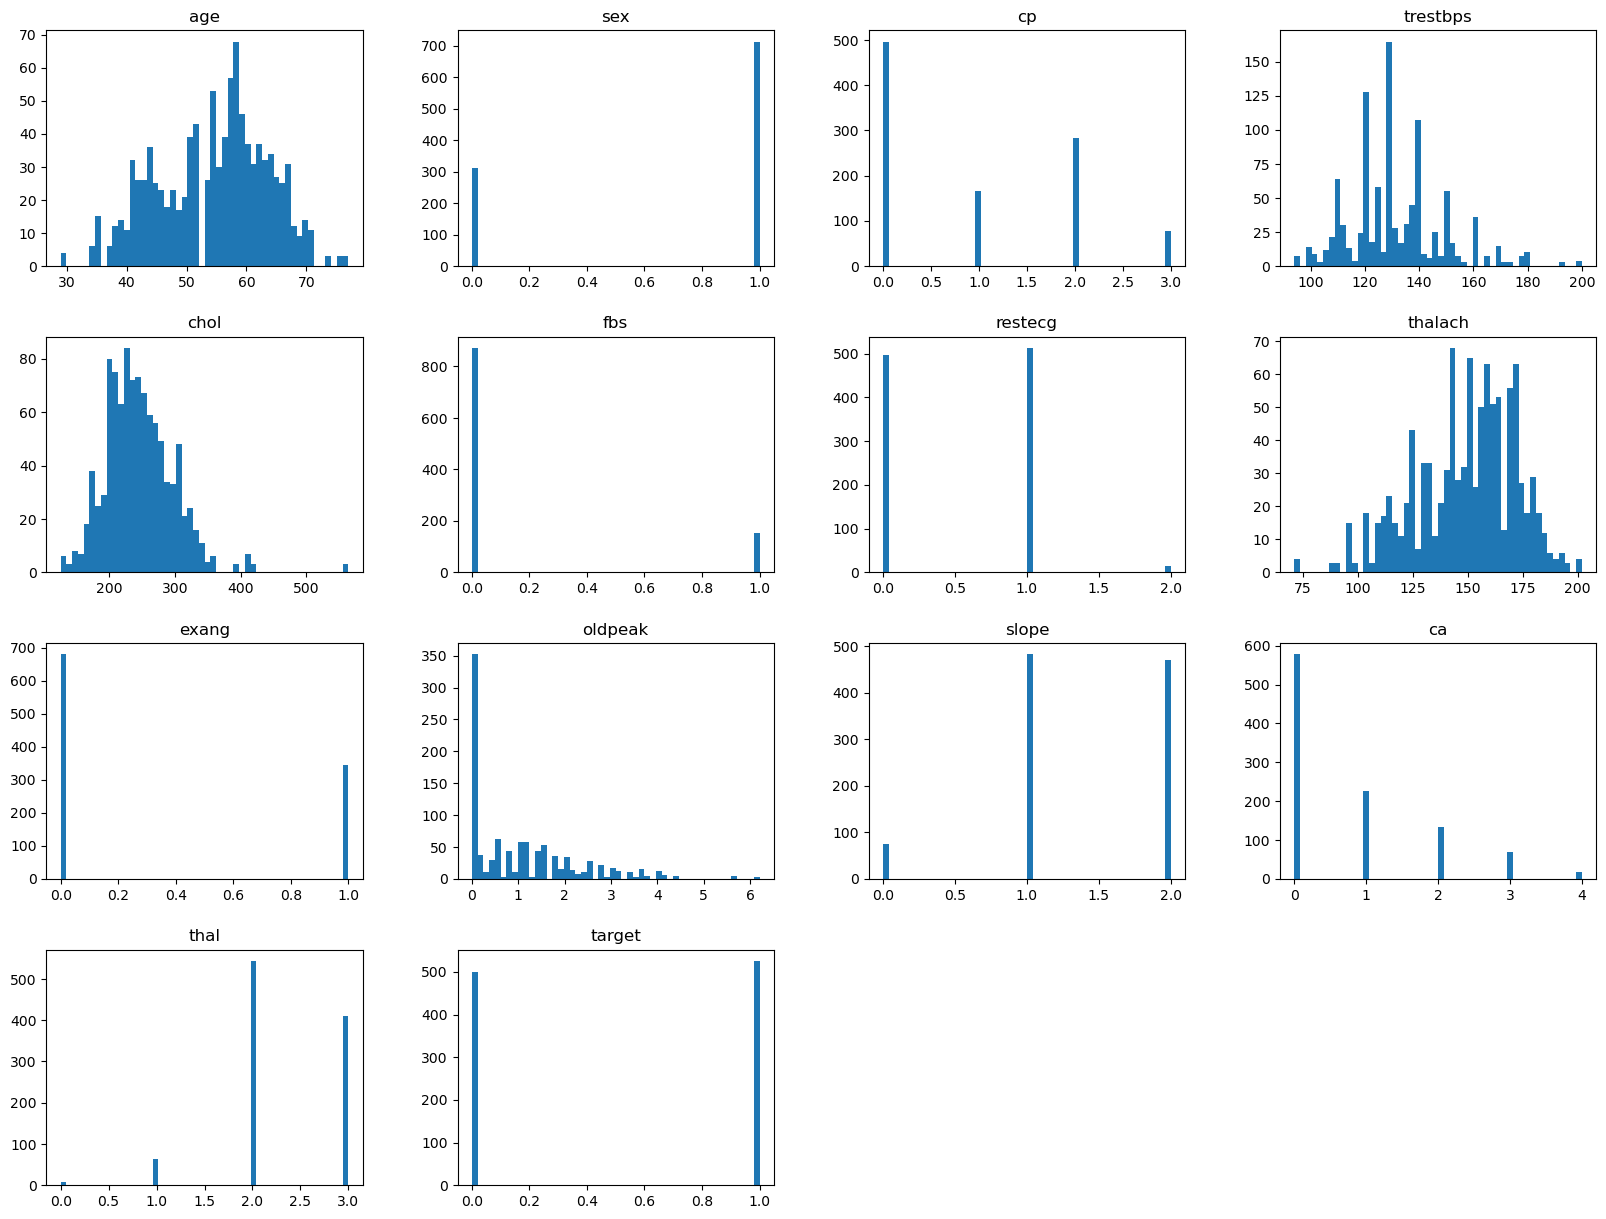

In [10]:
df.hist(bins=50, grid=False,figsize=(20,15))

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


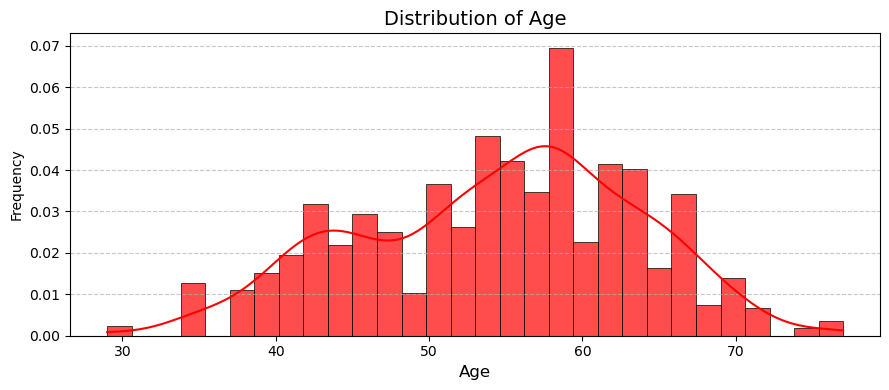

In [12]:
plt.figure(figsize=(9, 4))
sns.histplot(df['age'], bins=30, kde=True, color='red',edgecolor='black', linewidth=0.5,alpha=0.7,stat="density")
plt.title('Distribution of Age',fontsize=14)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

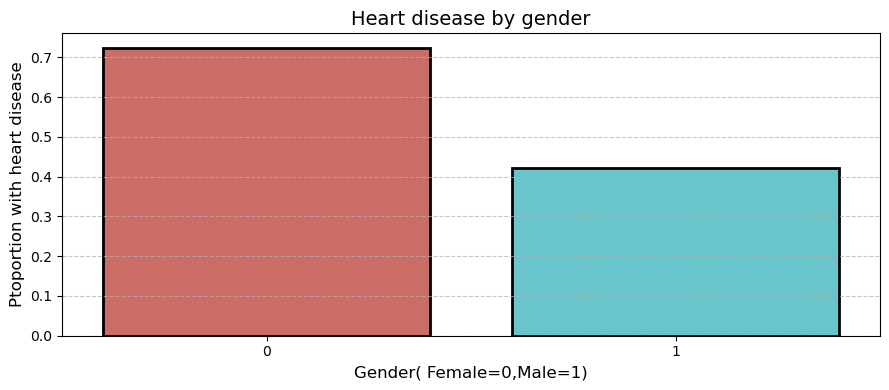

In [13]:
plt.figure(figsize=(9,4))
sns.barplot(x="sex",y="target",data=df, errorbar=None ,palette="hls",linewidth=2,edgecolor="black",)
plt.title("Heart disease by gender",fontsize=14)
plt.xlabel("Gender( Female=0,Male=1)",fontsize=12)
plt.ylabel("Ptoportion with heart disease",fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

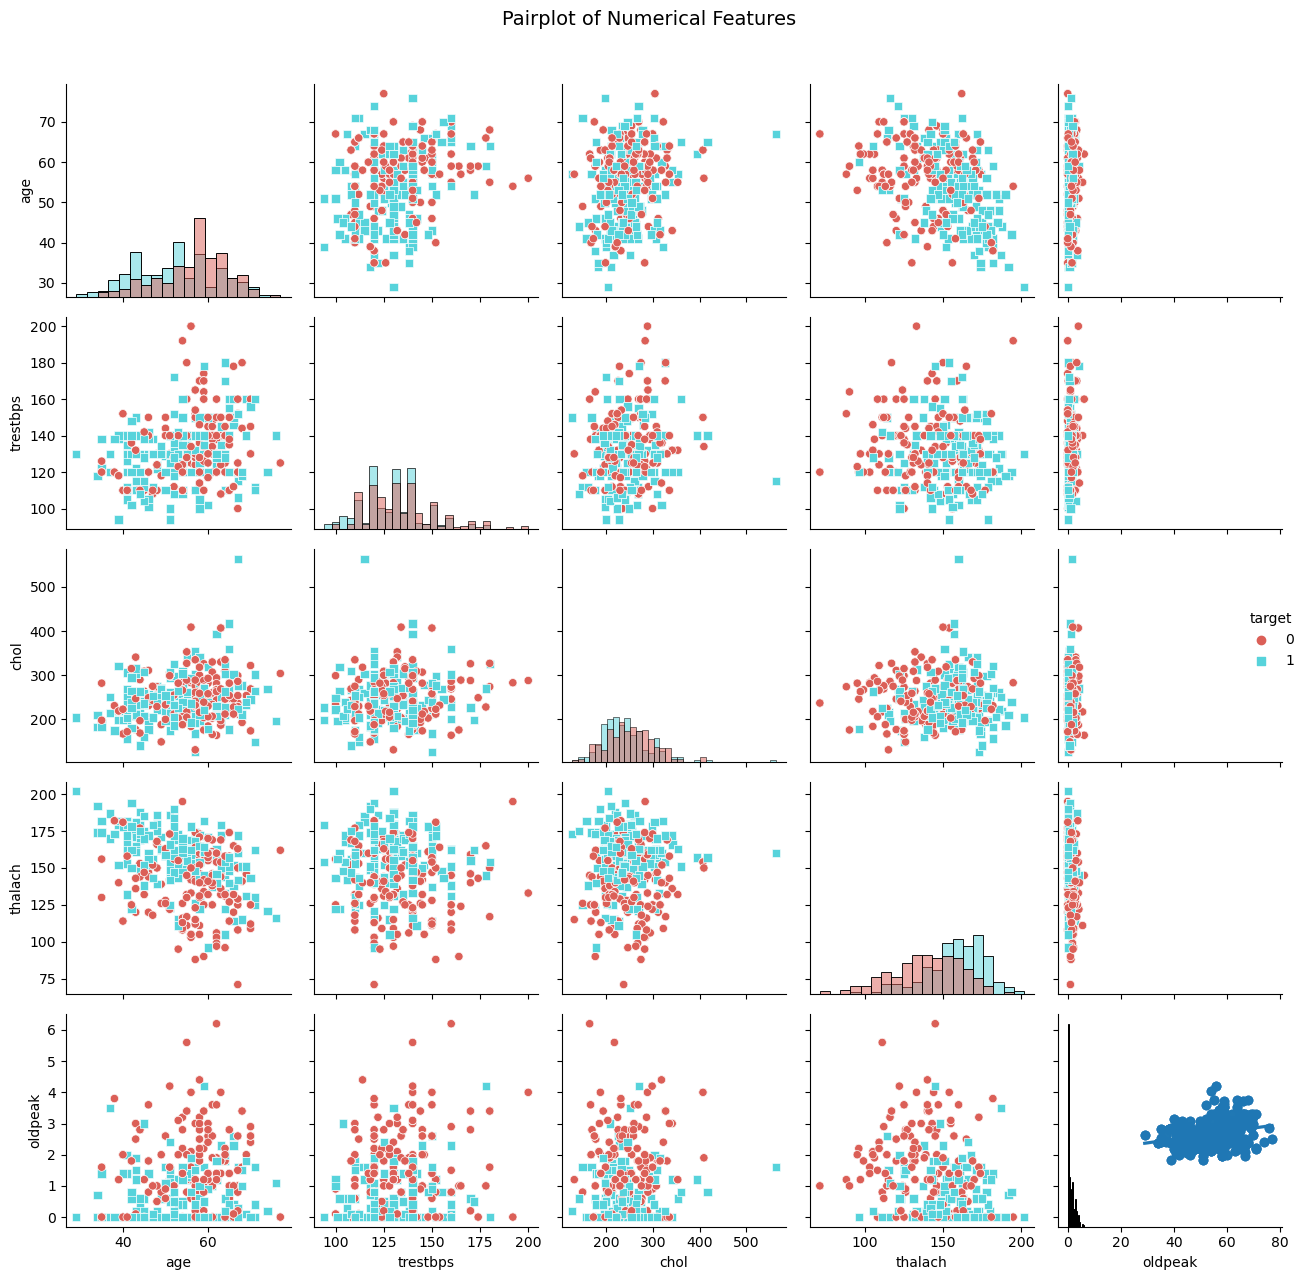

In [14]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue='target',
             palette='hls',size=2.5,diag_kind="hist", markers=["o", "s"])
plt.suptitle('Pairplot of Numerical Features', y=1.02,fontsize=14)
sns.regplot(x="age", y="trestbps", data=df, ax=plt.gca())
plt.tight_layout()
plt.show()


# Heart Disease Analysis: 10 Questions and Solutions

## Understanding the Data]
### Data Columns:

**age:** Age of the patient  
**sex:** 0 = female, 1 = male  
**cp:** Chest pain type (1-4)  
**trestbps:** Resting blood pressure (mm Hg)  
**chol:** Total serum cholesterol (mg/dl)  
**fbs:** Fasting blood sugar > 120 mg/dl (1 = True, 0 = False)  
**restecg:** Resting electrocardiographic results (0-2)  
**thalach:** Maximum heart rate achieved     
**exang:** Exercise-induced angina (1 = Yes, 0 = No)  
**oldpeak:** ST depression induced by exercise relative to rest  
**slope:** ST segment slope at peak exercise (1-3)     
**ca:** Number of major vessels (0-4)  
**thal:** Thalassemia (0-3)  
**target:** Heart disease diagnosis (1 = Yes, 0 = No)  

## **QUESTION -1 -** HOW MANY PEOPLE HAVE HEART DISEASE AND HOW MANY PEOPLE DOSEN'T HAVE HEART DISEASE ?
## SOLUTION -

In [18]:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

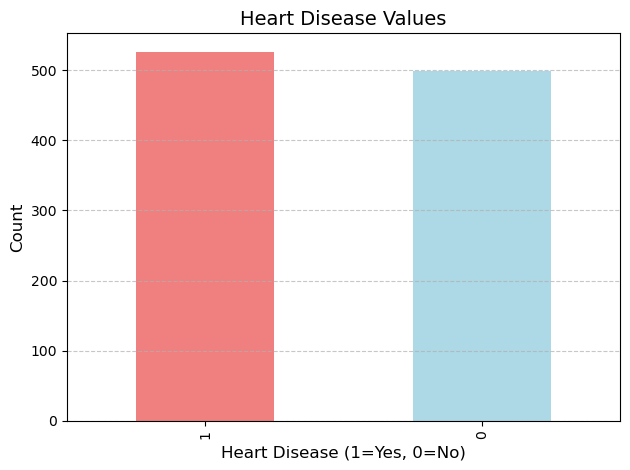

In [19]:
# plotting bar chart
import matplotlib.pyplot as plt
target_counts = df.target.value_counts()
target_counts.plot(kind='bar', color=["lightcoral", "lightblue"])
plt.title("Heart Disease Values", fontsize=14)
plt.xlabel("Heart Disease (1=Yes, 0=No)", fontsize=12)  
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

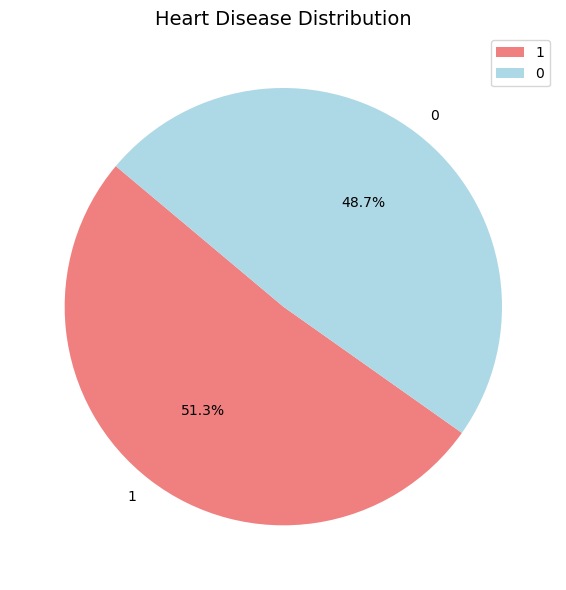

In [20]:
import matplotlib.pyplot as plt
target_counts = df.target.value_counts()
plt.figure(figsize=(8, 6))  
wedges, texts, autotexts = plt.pie(
    target_counts, labels=target_counts.index, autopct="%1.1f%%", startangle=140, colors=["lightcoral", "lightblue"]
)
plt.gca().set_prop_cycle('color', ["lightcoral", "lightblue"])  
plt.legend(wedges, target_counts.index, loc="best")
plt.title("Heart Disease Distribution", fontsize=14)
plt.gca().set_aspect("equal")  

plt.tight_layout()
plt.show()

In [21]:
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

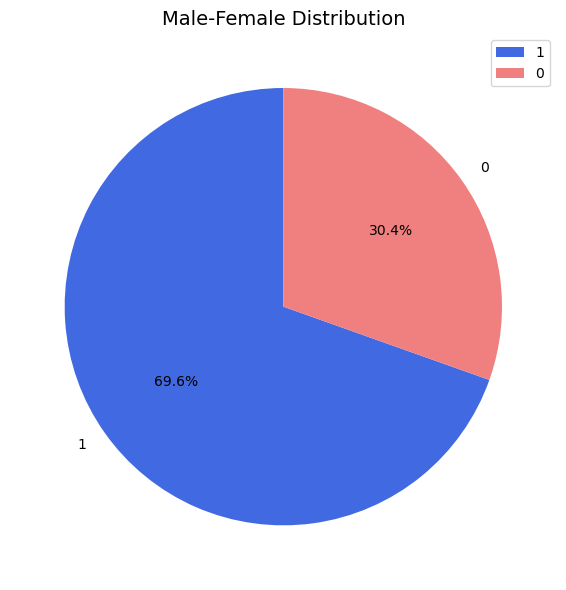

In [22]:
import matplotlib.pyplot as plt
sex_counts = df.sex.value_counts()  
plt.figure(figsize=(8, 6))  
wedges, texts, autotexts = plt.pie(
    sex_counts,
    labels=sex_counts.index,  
    autopct="%1.1f%%",  
    startangle=90,  
    colors=["royalblue", "lightcoral"]  
)
plt.gca().set_prop_cycle('color', ["royalblue", "lightcoral"])  
plt.legend(wedges, sex_counts.index, loc="best") 
plt.title('Male-Female Distribution', fontsize=14)  
plt.gca().set_aspect("equal")  
plt.tight_layout()
plt.show()

## **QUESTION -2 -** people of which sex has most heart disease ?

In [24]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


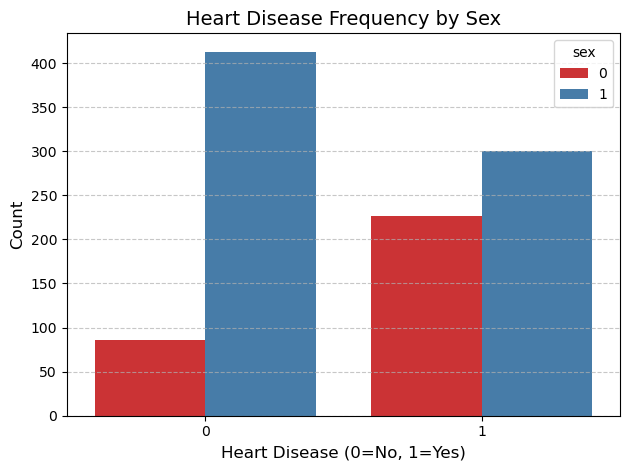

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='target', data=df, hue='sex', palette='Set1')  
plt.title("Heart Disease Frequency by Sex", fontsize=14) 
plt.xlabel("Heart Disease (0=No, 1=Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 **SOLUTION 2-** Number of Male is More Than Double in our Dataset Than Female.
 More Than "45% Male" Has Heart Disease And "75% Female" Has Heart Disease.

## **QUESTION -3 -** people of which sex has which type of chest pain most ?

In [28]:
df.cp.value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

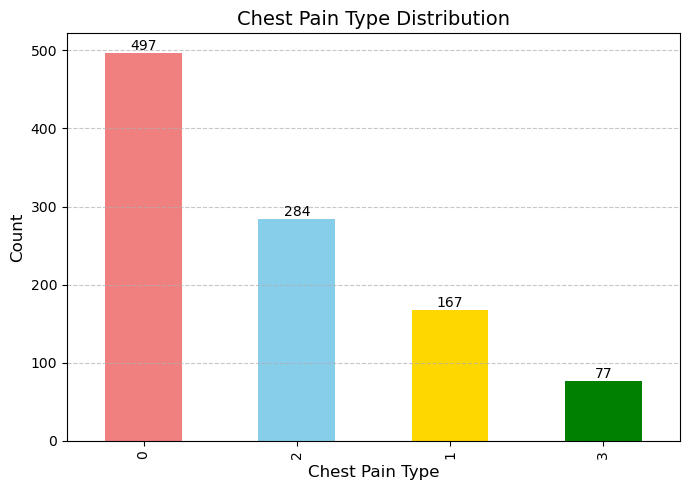

In [29]:
import matplotlib.pyplot as plt
cp_counts = df.cp.value_counts()
plt.figure(figsize=(7, 5))  
cp_counts.plot(kind='bar', color=['lightcoral', 'skyblue', 'gold', 'green'])  
plt.title("Chest Pain Type Distribution", fontsize=14)
plt.xlabel("Chest Pain Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
for i, (cp_type, count) in enumerate(cp_counts.items()):
    plt.text(i, count, f"{count}", ha='center', va='bottom')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [30]:
pd.crosstab(df.sex,df.cp)

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


<Figure size 1000x600 with 0 Axes>

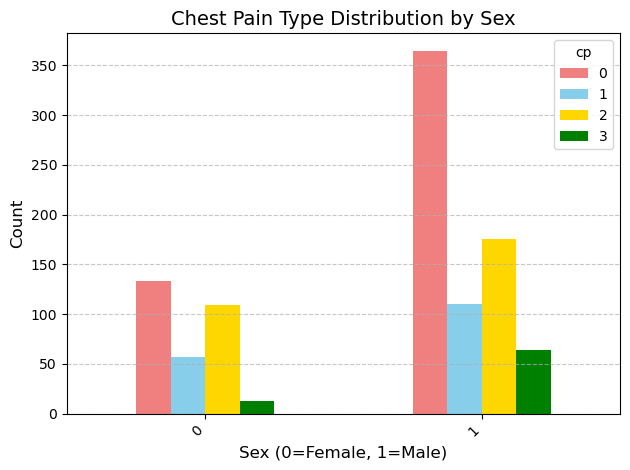

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
cp_crosstab = pd.crosstab(df.sex, df.cp)
plt.figure(figsize=(10, 6))  
cp_crosstab.plot(kind='bar', color=['lightcoral', 'skyblue', 'gold', 'green'])  
plt.title("Chest Pain Type Distribution by Sex", fontsize=14)
plt.xlabel("Sex (0=Female, 1=Male)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 **SOLUTION 3-** Most of 'Male' Has 'Type 0' Chest Pain And Leat of 'Male' Has 'Type 4' Pain.  
                   In Case of 'Female' 'type 0' and 'type 2' Percentage is almost same.

## **QUESTION -4 -** people with which chest pain are most pron to have heart disease ?

In [34]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


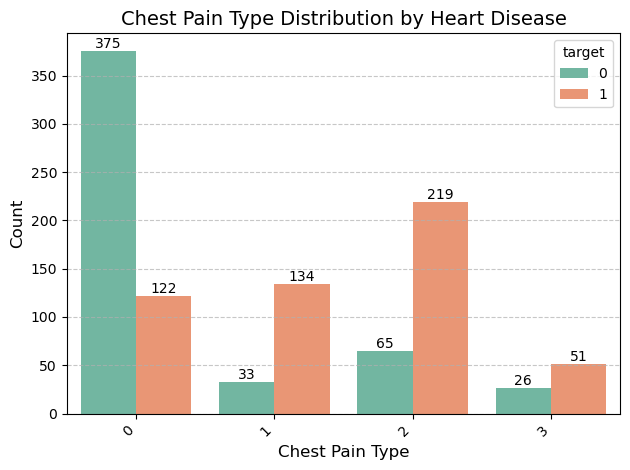

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x='cp', data=df, hue='target', palette='Set2')
plt.title("Chest Pain Type Distribution by Heart Disease", fontsize=14)
plt.xlabel("Chest Pain Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], label_type='edge')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 **SOLUTION 4-** Most of People Who Has 'type 0' chest pain Has Less Chance of Heart Disease.  
                 

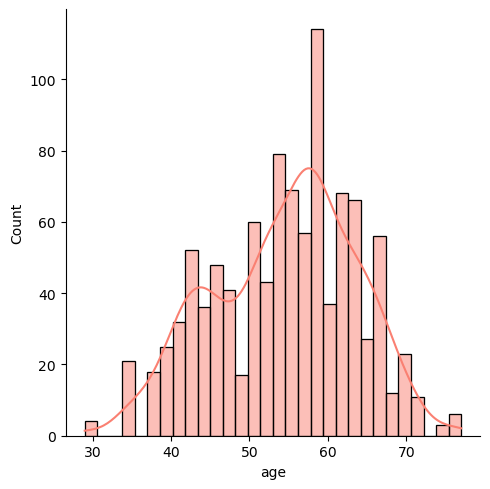

In [37]:
# create a distribution plot with normal distribution curve
sns.displot(x='age', data=df, bins=30, kde=True,color='salmon')

## Question 5- How does the number of major vessels (ca) affect the likelihood of heart disease?

In [39]:
pd.crosstab(df.ca,df.target)

target,0,1
ca,,
0,163,415
1,160,66
2,113,21
3,60,9
4,3,15


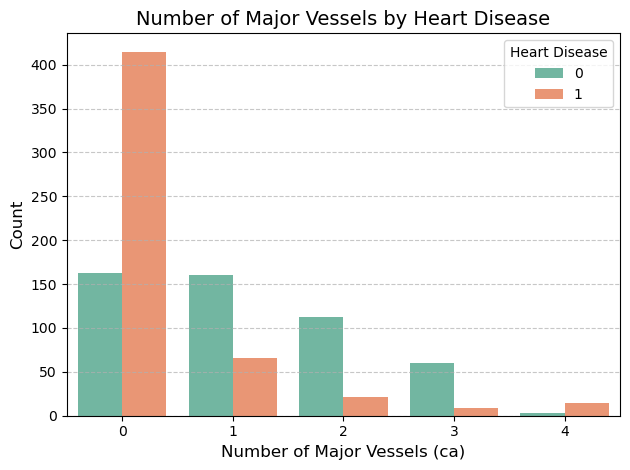

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='ca', hue='target', data=df, palette='Set2')  
plt.title("Number of Major Vessels by Heart Disease", fontsize=14)
plt.xlabel("Number of Major Vessels (ca)", fontsize=12)  
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], label_type='edge')
plt.legend(title="Heart Disease")
plt.tight_layout()
plt.show()

 **Solution-**   
 **0 Major Vessels:** Patients with 0 major vessels (ca=0) have a significantly higher chance of having heart disease (target=1) compared to those with 1 or more major vessels.  
**1 Major Vessel:** While still higher than 2 or more vessels, the likelihood of heart disease is lower for patients with 1 major vessel compared to those with 0.  
**2 or More Major Vessels:** Patients with 2 or more major vessels have a relatively low likelihood of heart disease.

## Question 6- What is the distribution of age among patients with and without heart disease?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


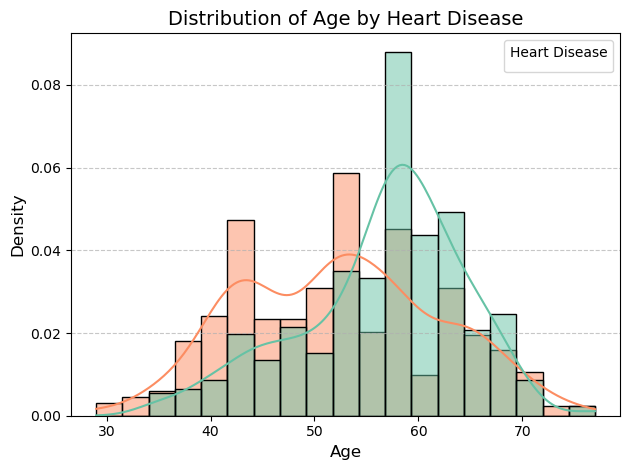

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(
    data=df,
    x='age',
    hue='target',
    stat="density",  
    kde=True,
    palette='Set2', 
    common_norm=False  
)
plt.title("Distribution of Age by Heart Disease", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Heart Disease")
plt.tight_layout()
plt.show()

**Solution-**   
**Younger Ages:** There is a relatively smaller proportion of younger individuals (30-50) with heart disease compared to older individuals.  
**Older Ages:** The distribution of ages for individuals with heart disease peaks around the 55-60 age range.  
**Overlap:** While the distributions overlap to some extent, the overall trend suggests that older age is a risk factor for heart disease.  
**In general, the data indicates that the likelihood of heart disease increases with age.** 

## Question 7-  Is there a difference in the distribution of cholesterol levels between males and females?

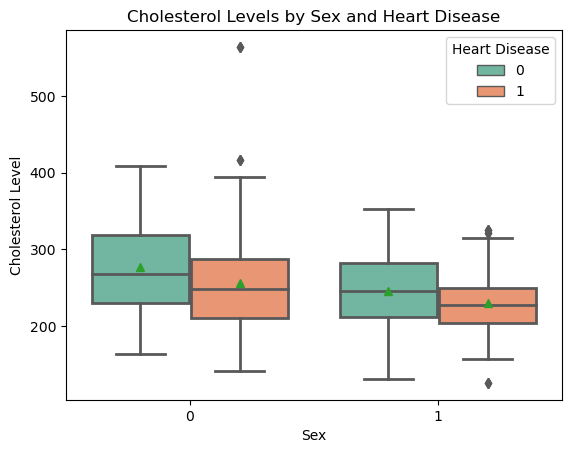

In [46]:
sns.boxplot(x='sex', y='chol', data=df,palette='Set2', hue='target',linewidth=2,showmeans=True)
plt.title('Cholesterol Levels by Sex and Heart Disease')
plt.xlabel('Sex')
plt.ylabel('Cholesterol Level')
plt.legend(title='Heart Disease')
plt.show()

**solution-**  
**Median Cholesterol:** The median cholesterol level for males seems to be slightly higher than that for females.  
**Interquartile Range (IQR):** The IQR, which represents the spread of the middle 50% of the data, appears to be similar for both sexes.  
**Outliers:** There are a few outliers present in both groups, but they are more prominent in the female group.  
**Distribution:** The overall shape of the distributions is similar, with both groups showing a slight skew to the right.

## QUESTION 8- What is the correlation between age and resting blood pressure (trestbps)?

Correlation between age and trestbps: 0.27


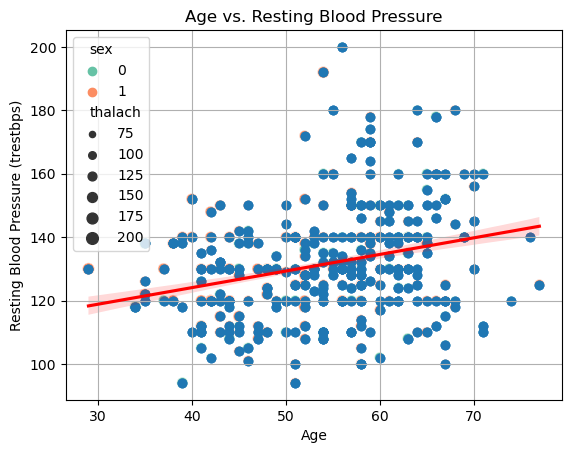

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation = df['age'].corr(df['trestbps'])
print(f"Correlation between age and trestbps: {correlation:.2f}")
sns.scatterplot(
    x='age',
    y='trestbps',
    data=df,
    hue='sex',  
    palette='Set2',  
    size='thalach',  
    alpha=0.7, 
)

sns.regplot(x='age', y='trestbps', data=df, line_kws={'color': 'red'})
plt.title('Age vs. Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.grid(True)  
plt.show()

**solution**-  
While there is a general upward trend indicating that resting blood pressure tends to increase with age, the relationship is not very strong. There are a lot of points that deviate from the regression line, suggesting that other factors besides age also influence resting blood pressure.